In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
Past_data = pd.read_csv('C:/Users/karan/Desktop/Projects/Datas/PastHires.csv')

In [3]:
Past_data

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [4]:
Past_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Years Experience    13 non-null     int64 
 1   Employed?           13 non-null     object
 2   Previous employers  13 non-null     int64 
 3   Level of Education  13 non-null     object
 4   Top-tier school     13 non-null     object
 5   Interned            13 non-null     object
 6   Hired               13 non-null     object
dtypes: int64(2), object(5)
memory usage: 860.0+ bytes


In [5]:
Past_data.isnull().sum()

Years Experience      0
Employed?             0
Previous employers    0
Level of Education    0
Top-tier school       0
Interned              0
Hired                 0
dtype: int64

In [6]:
Past_data.duplicated().sum()

np.int64(0)

In [7]:
d = {'Y': 1, 'N': 0}
Past_data['Employed?'] = Past_data['Employed?'].map(d)
Past_data['Interned'] = Past_data['Interned'].map(d)
Past_data['Top-tier school'] = Past_data['Top-tier school'].map(d)
e = {'BS': 1, 'MS' : 2, 'PhD': 3}
Past_data['Level of Education'] = Past_data['Level of Education'].map(e)

In [8]:
num = Past_data.select_dtypes(exclude = ['object']).columns.tolist()

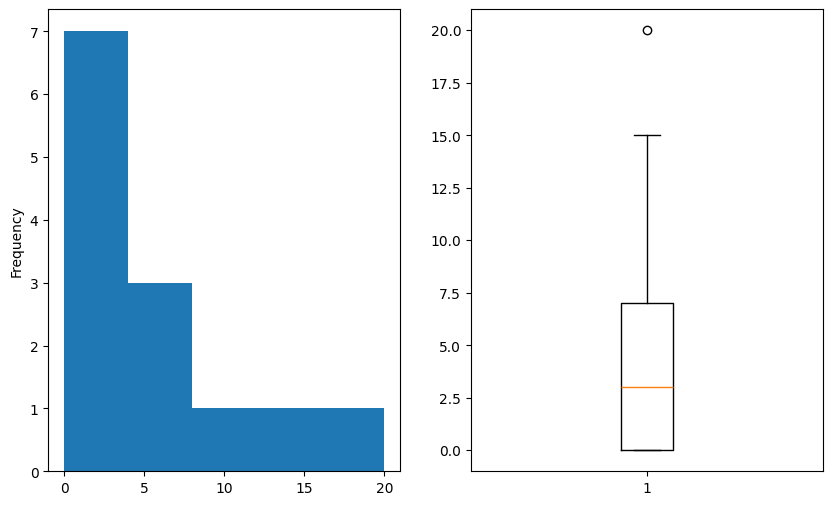

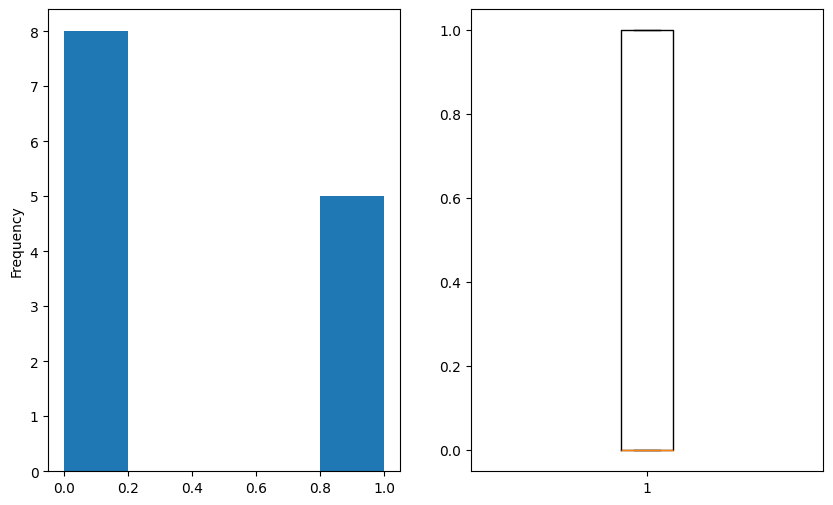

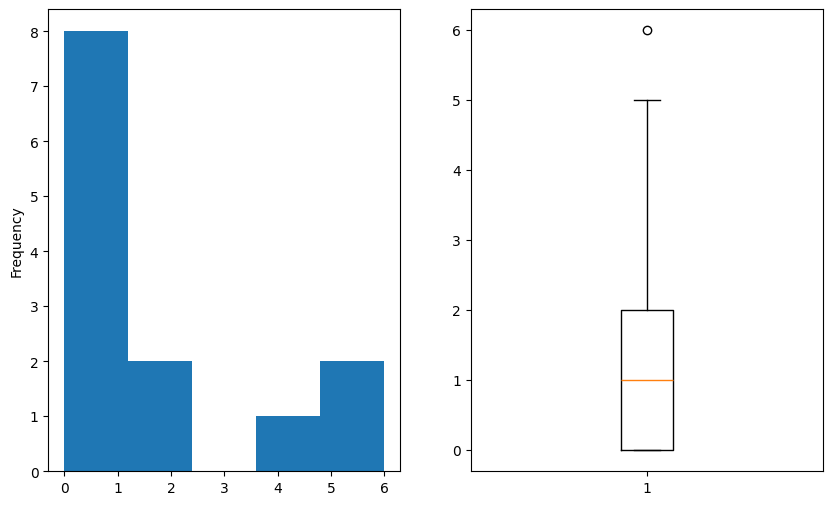

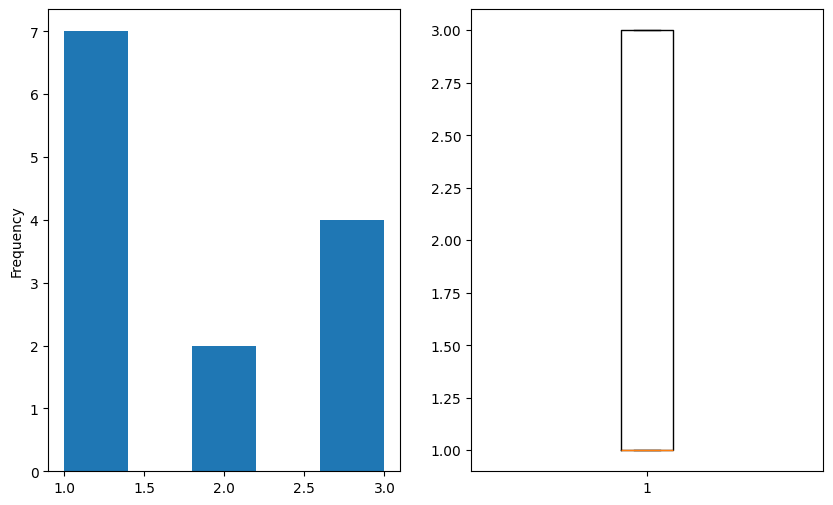

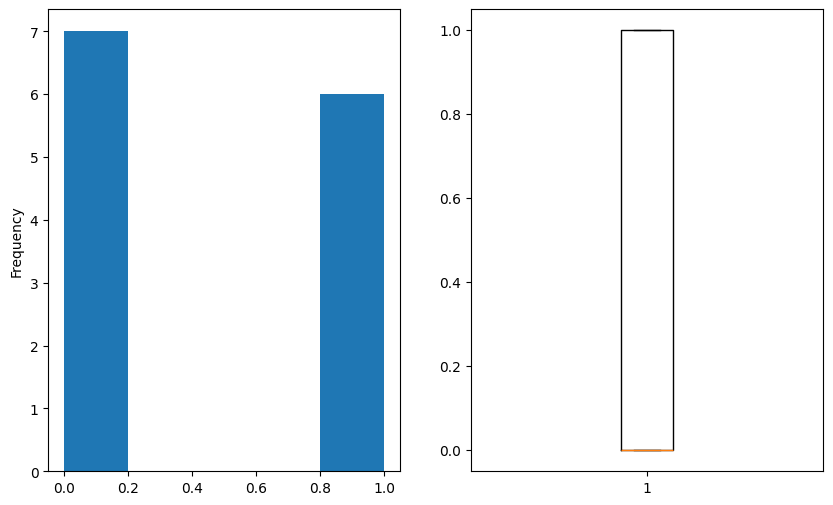

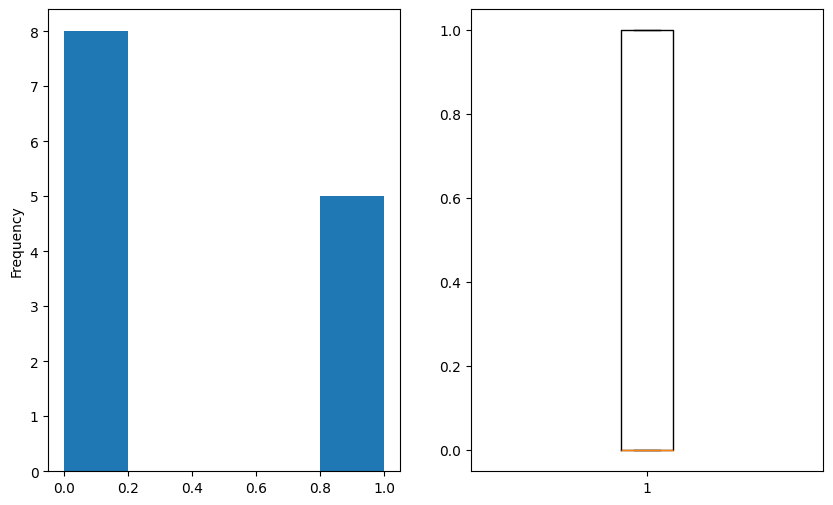

In [9]:
for col in num:
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    Past_data[col].hist(bins = 5, grid = False)
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    plt.boxplot(Past_data[col])
    plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [11]:
features = list(Past_data.columns[:6])

In [12]:
y = Past_data['Hired']
x = Past_data[features]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

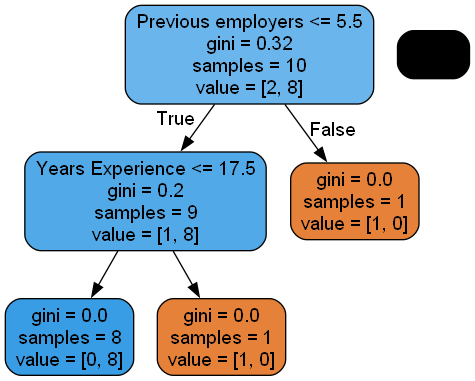

In [14]:
dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns, rounded =True, proportion = False, precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [15]:
y_pred = model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy)
print("classification_report: ", classification_rep)
print("confusion Matrix: ", conf_matrix)

Accuracy:  0.3333333333333333
classification_report:                precision    recall  f1-score   support

           N       0.00      0.00      0.00         2
           Y       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

confusion Matrix:  [[0 2]
 [0 1]]


In [17]:
new = [[25,0,1,2,1,1]]
y_pred_new = model.predict(new)
y_pred_new[0]

'N'